In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
df = pd.read_csv("milknew.csv")
df.shape

(1059, 8)

In [14]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [15]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [17]:
df.rename(columns=lambda x: x.strip(), inplace = True)

# Normalization

In [18]:
from sklearn import preprocessing

df_raw_data = df.iloc[:, :7]        
print("*** Before Normalization: \n", df_raw_data)
data_numpy = df_raw_data.values     # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
data_scaled_numpy = min_max_scaler.fit_transform(data_numpy)
df_norm_data = pd.DataFrame(data_scaled_numpy)
print("*** After Normalization: \n", df_norm_data)

*** Before Normalization: 
        pH  Temprature  Taste  Odor  Fat  Turbidity  Colour
0     6.6          35      1     0    1          0     254
1     6.6          36      0     1    0          1     253
2     8.5          70      1     1    1          1     246
3     9.5          34      1     1    0          1     255
4     6.6          37      0     0    0          0     255
...   ...         ...    ...   ...  ...        ...     ...
1054  6.7          45      1     1    0          0     247
1055  6.7          38      1     0    1          0     255
1056  3.0          40      1     1    1          1     255
1057  6.8          43      1     0    1          0     250
1058  8.6          55      0     1    1          1     255

[1059 rows x 7 columns]
*** After Normalization: 
              0         1    2    3    4    5         6
0     0.553846  0.017857  1.0  0.0  1.0  0.0  0.933333
1     0.553846  0.035714  0.0  1.0  0.0  1.0  0.866667
2     0.846154  0.642857  1.0  1.0  1.0  1.0  0

In [19]:
df2 = df_norm_data

df2 = pd.concat([df2, df['Grade']], axis=1)

# Cross-Validation(3-fold)

In [22]:
X = df.drop(columns=['Grade']) 
y = df['Grade']

for n_splits in [3, 5, 10]:
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    model = DecisionTreeClassifier()
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"n_splits={n_splits}: Mean Accuracy = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}")

n_splits=3: Mean Accuracy = 0.9953, Std Dev = 0.0013
n_splits=5: Mean Accuracy = 0.9943, Std Dev = 0.0035
n_splits=10: Mean Accuracy = 0.9943, Std Dev = 0.0063


n_splits=3 has the smallest standard deviation, meaning the model is most stable with 3-fold cross-validation.

# Decision Tree

#### cv, k-fold=3

In [26]:
# KFold cross-validation with k=3
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Decision tree model
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Scores: [0.99433428 0.99716714 0.99433428]
Mean Accuracy: 0.9952785646836638


#### training set（80%） and test set （20%）

Accuracy: 0.9953
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       1.00      1.00      1.00        86
      medium       0.99      1.00      0.99        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
[[50  0  1]
 [ 0 86  0]
 [ 0  0 75]]


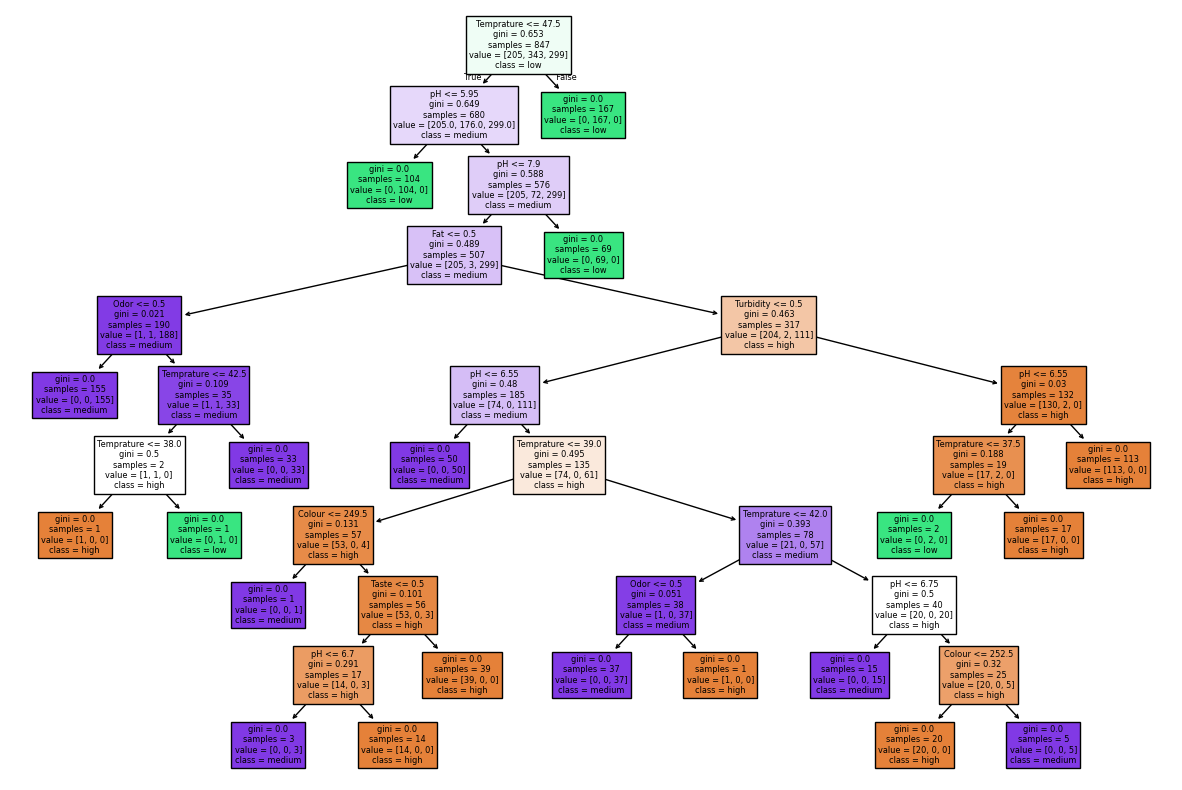

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17, stratify=y)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize and train the model
model = DecisionTreeClassifier(random_state=17)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

#### Use 80% of the data as the training set for cross-validation (CV) and the remaining 20% as the test set:

Cross-Validation Accuracy Scores: [0.9964664310954063, 0.9964539007092199, 0.9822695035460993]
Mean CV Accuracy: 0.9917
CV Accuracy Std Dev: 0.0067

Final Test Accuracy: 0.9953
Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       1.00      1.00      1.00        86
      medium       0.99      1.00      0.99        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
[[50  0  1]
 [ 0 86  0]
 [ 0  0 75]]


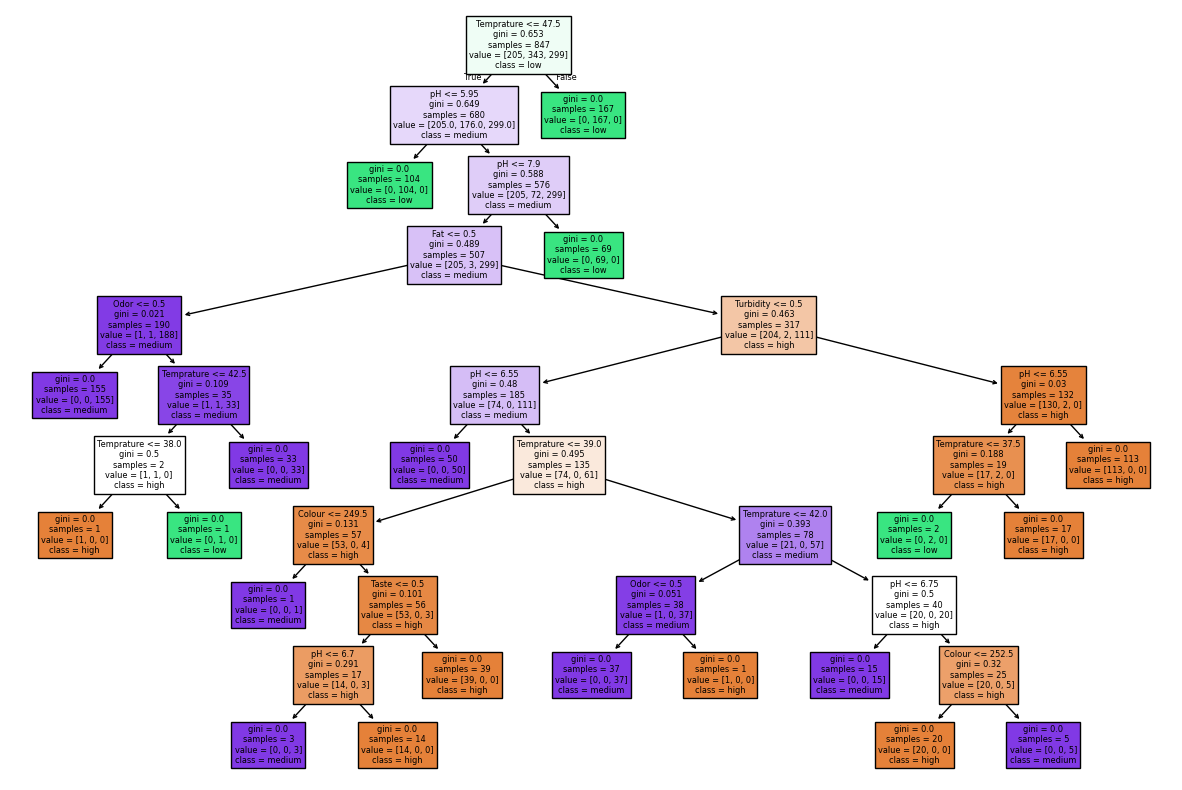

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_t
st_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Split the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17, stratify=y
)

# Step 2: Perform K-Fold Cross-Validation on the training set (80% of data)
kf = KFold(n_splits=3, shuffle=True, random_state=42)  # KFold with 3 splits
model = DecisionTreeClassifier(random_state=17)

fold_accuracies = []
for train_index, val_index in kf.split(X_train):
    # Get train and validation data for this fold
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)

    # Evaluate the model on the validation fold
    fold_accuracy = model.score(X_val_fold, y_val_fold)
    fold_accuracies.append(fold_accuracy)

# Print cross-validation results
print("Cross-Validation Accuracy Scores:", fold_accuracies)
print(f"Mean CV Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"CV Accuracy Std Dev: {np.std(fold_accuracies):.4f}")

# Step 3: Train the model on the full training set (80%) and evaluate on the test set (20%)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()